### Jupyter Notebook for 'Heineken' Google Trends Data, assessing the impact of Pogba rejecting Heineken on TV

In [35]:
import warnings
import seaborn as sns
from viziviz import *

warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 8)

In [36]:
viz = Visualizer('Heineken', '2021-06-15', 'Pogba Rejects Heineken on TV')
df_heineken = viz.load_df('data/Heineken/clean/2021_clean_full.csv',index_col=0)
#remove leap dates from leap years
df_heineken = viz.remove_leap_days(df_heineken)

# EDA

We start by exploring the data

### 1. Harmonization Differences

##### Raw Daily vs Harmonized Daily

In [37]:
viz.px_line_graph(df_heineken,'date','harmonized_daily',event_date=viz.event_date,z_name='region',title='Harmonized Global Daily Searches for "Heineken" - 2021')

In [38]:
viz.px_line_graph(df_heineken,'date','raw_daily',event_date=viz.event_date,z_name='region',title='Raw Global Daily Searches for "Heineken" - 2015-2024')


#### 1.1 Comparing Harmonized vs Non Harmonized

In [39]:
df_world_21 = df_heineken[(df_heineken['region'] == 'world') & (df_heineken['year'] == 2021)]
fig = viz.plot_multi_lines(df_world_21,'date','harmonized_daily','raw_daily',title='Global Daily Searches for "Heineken" - 2021 - Harmonized vs Raw')
fig.show()

### Statistical Summary

In [40]:
df_heineken['region'] = df_heineken['region'].astype('category')
grouped = df_heineken.groupby('region')
grouped.get_group('GB').describe()

,date,raw_daily,raw_weekly,harmonized_daily,year,month,day,days,time_numeric,days_since_event
count,365,365.000000,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2021-07-02 00:00:00,49.953425,50.526027,23.572721,2021.0,6.526027,15.720548,183.000000,183.000000,17.000000
min,2021-01-01 00:00:00,0.000000,32.000000,0.000000,2021.0,1.000000,1.000000,1.000000,1.000000,-165.000000
25%,2021-04-02 00:00:00,31.000000,39.000000,17.163713,2021.0,4.000000,8.000000,92.000000,92.000000,-74.000000
50%,2021-07-02 00:00:00,47.000000,44.000000,21.000000,2021.0,7.000000,16.000000,183.000000,183.000000,17.000000
75%,2021-10-01 00:00:00,66.000000,58.000000,26.479643,2021.0,10.000000,23.000000,274.000000,274.000000,108.000000
max,2021-12-31 00:00:00,100.000000,100.000000,100.000000,2021.0,12.000000,31.000000,365.000000,365.000000,199.000000
std,NaN,21.897000,15.478184,11.691179,0.0,3.452584,8.808321,105.510663,105.510663,105.510663


In [41]:
grouped.get_group('world').describe()

,date,raw_daily,raw_weekly,harmonized_daily,year,month,day,days,time_numeric,days_since_event
count,365,365.000000,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2021-07-02 00:00:00,70.254795,60.115068,33.836195,2021.0,6.526027,15.720548,183.000000,183.000000,17.000000
min,2021-01-01 00:00:00,32.000000,48.000000,21.827446,2021.0,1.000000,1.000000,1.000000,1.000000,-165.000000
25%,2021-04-02 00:00:00,62.000000,53.000000,28.090054,2021.0,4.000000,8.000000,92.000000,92.000000,-74.000000
50%,2021-07-02 00:00:00,69.000000,59.000000,32.452366,2021.0,7.000000,16.000000,183.000000,183.000000,17.000000
75%,2021-10-01 00:00:00,81.000000,63.000000,37.361568,2021.0,10.000000,23.000000,274.000000,274.000000,108.000000
max,2021-12-31 00:00:00,100.000000,100.000000,100.000000,2021.0,12.000000,31.000000,365.000000,365.000000,199.000000
std,NaN,14.956834,9.334323,8.140338,0.0,3.452584,8.808321,105.510663,105.510663,105.510663


In [42]:
grouped.get_group('US').describe()

,date,raw_daily,raw_weekly,harmonized_daily,year,month,day,days,time_numeric,days_since_event
count,365,365.000000,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2021-07-02 00:00:00,57.219178,60.465753,17.966966,2021.0,6.526027,15.720548,183.000000,183.000000,17.000000
min,2021-01-01 00:00:00,10.000000,47.000000,6.884347,2021.0,1.000000,1.000000,1.000000,1.000000,-165.000000
25%,2021-04-02 00:00:00,46.000000,55.000000,14.383080,2021.0,4.000000,8.000000,92.000000,92.000000,-74.000000
50%,2021-07-02 00:00:00,56.000000,58.000000,16.776640,2021.0,7.000000,16.000000,183.000000,183.000000,17.000000
75%,2021-10-01 00:00:00,70.000000,64.000000,20.171934,2021.0,10.000000,23.000000,274.000000,274.000000,108.000000
max,2021-12-31 00:00:00,100.000000,100.000000,100.000000,2021.0,12.000000,31.000000,365.000000,365.000000,199.000000
std,NaN,19.853894,9.534325,6.509481,0.0,3.452584,8.808321,105.510663,105.510663,105.510663


#### Bar Plot by Month & Region

In [43]:
dfs_2021 = df_heineken[(df_heineken['year'] == 2021)]
fig = viz.bar_char_by_categories(dfs_2021, 'month','harmonized_daily','harmonized_daily','region',title=f'Monthly Searches for "Heineken" by Region in 2021')
fig.show()


#### Heatmap by region

In [44]:
fig = viz.heatmap_category(df_heineken,'date', 'harmonized_daily', 'region')
fig.show()

### 2. PELT Change Point

In [45]:
grouped = dfs_2021.groupby('region')
fig = viz.pelt_model_l2(grouped.get_group('GB'),'date','harmonized_daily')
fig.show()

In [46]:
fig = viz.pelt_model_l2(grouped.get_group('US'),'date','harmonized_daily')
fig.show()

In [47]:
fig = viz.pelt_model_l2(grouped.get_group('world'),'date','harmonized_daily')
fig.show()

In [48]:
fig = viz.plot_common_change_points([grouped.get_group('world'),grouped.get_group('GB'),grouped.get_group('US')],dfs_2021,'date', 'harmonized_daily')
fig.show()

In [49]:
fig = viz.plot_common_change_points([grouped.get_group('GB'),grouped.get_group('US')],dfs_2021[dfs_2021['region']!='world'],'date', 'harmonized_daily')
fig.show()

### 3. Seasonal Data

In [50]:
world_data_2021 = grouped.get_group('world')
world_data_2021.reset_index(drop=True,inplace=True)
fig = viz.plot_seasonal_data(world_data_2021,'harmonized_daily',30)
fig.show()

In [51]:
gb_data_2021 = grouped.get_group('GB')
gb_data_2021.reset_index(drop=True,inplace=True)
fig = viz.plot_seasonal_data(gb_data_2021,'harmonized_daily',30)
fig.show()

In [52]:
us_data_2021 = grouped.get_group('US')
us_data_2021.reset_index(drop=True,inplace=True)
fig = viz.plot_seasonal_data(us_data_2021,'harmonized_daily',30)
fig.show()

# Regressions

### 1.RDD
#### 1. Worldwide data for +/- 45 days

In [63]:
from datetime import timedelta
df_heineken_90 = viz.filter_by_date(df_heineken, int(44))
fig = viz.px_line_graph(df_heineken_90,'date','harmonized_daily',event_date=viz.event_date,z_name='region',title='Harmonized Daily Searches for "Heineken" - 45 days pre and post event')
fig.show()

In [64]:
df_heineken_90 = df_heineken_90[df_heineken_90['region'] == 'world']
df_heineken_cutoff = df_heineken_90[df_heineken_90['date'] == viz.event_date].days.values[0]
df_heineken_90['time_numeric'] = df_heineken_90.days - df_heineken_cutoff
viz.cutoff_date = 0
model = viz.gen_rdd_model_data(df_heineken_90,'time_numeric','harmonized_daily',model=True)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       harmonized_daily   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     5.769
Date:                Wed, 17 Jan 2024   Prob (F-statistic):            0.00446
Time:                        10:57:57   Log-Likelihood:                -338.41
No. Observations:                  89   AIC:                             682.8
Df Residuals:                      86   BIC:                             690.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       31.8417      2.638     12.071   

In [65]:
fig = viz.plotly_model_rdd(df_heineken_90,'time_numeric','harmonized_daily','World',3,1,add_line=True)
fig.show()

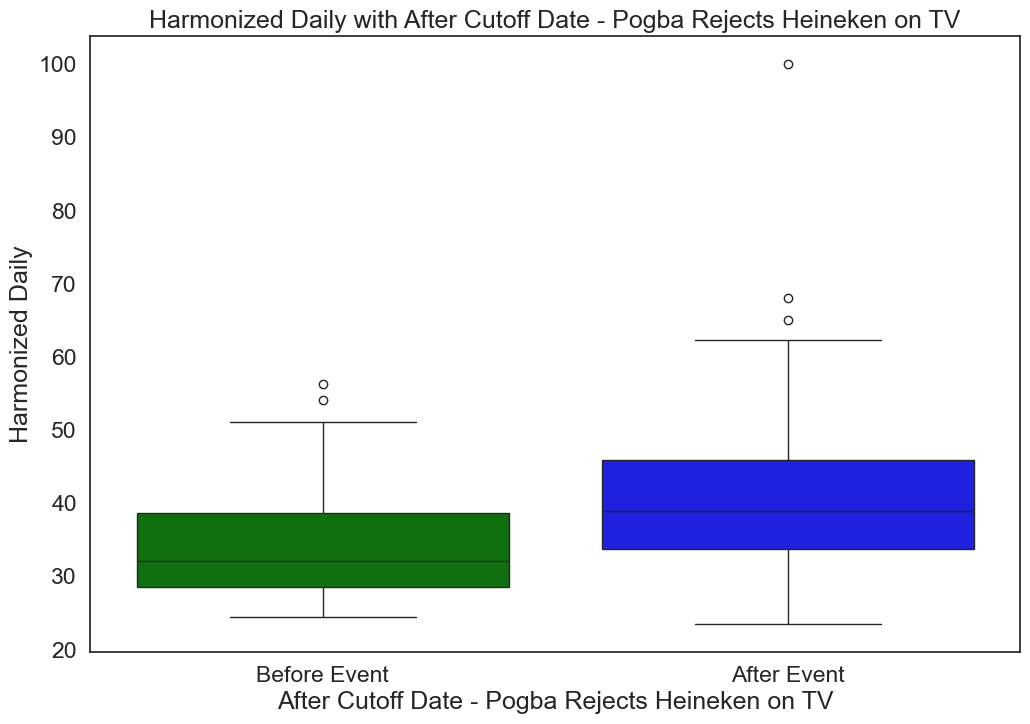

In [66]:
viz.box_plot(df_heineken_90,'harmonized_daily')


##### 2. Worldwide data for +/- 30 days

In [68]:
df_heineken_30 = viz.filter_by_date(df_heineken, int(14))
fig = viz.px_line_graph(df_heineken_30,'date','harmonized_daily',event_date=viz.event_date,z_name='region',title='Harmonized Global Daily Searches for "Heineken" - 15 days pre and post event')
fig.show()


In [69]:
df_heineken_30 = df_heineken_30[df_heineken_30['region'] == 'world']
df_heineken_cutoff = df_heineken_30[df_heineken_30['date'] == viz.event_date].days.values[0]
df_heineken_30['time_numeric'] = df_heineken_30.days - df_heineken_cutoff
model = viz.gen_rdd_model_data(df_heineken_30,'days_since_event','harmonized_daily',model=True)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       harmonized_daily   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     3.474
Date:                Wed, 17 Jan 2024   Prob (F-statistic):             0.0460
Time:                        10:58:14   Log-Likelihood:                -116.50
No. Observations:                  29   AIC:                             239.0
Df Residuals:                      26   BIC:                             243.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           28.0070      6.060  

In [70]:
fig = viz.plotly_model_rdd(df_heineken_30,'time_numeric','harmonized_daily','World',3,1,linear=True,add_line=True)
fig.show()

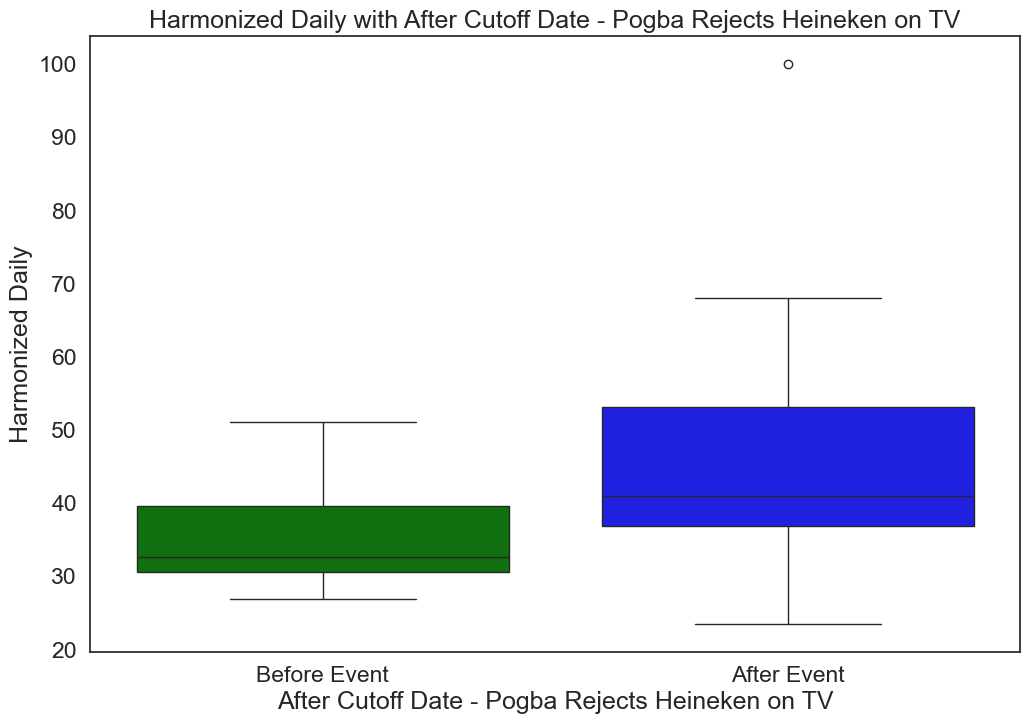

In [71]:
viz.box_plot(df_heineken_30,'harmonized_daily')

# 5. DID Analysis
#### Budweiser As Contorl

In [77]:
df_heineken['brand'] = 'Heineken'
df_budweiser = viz.load_df('data/Budweiser/clean/Budweiser_full.csv',index_col=0)
df_budweiser['brand'] = 'Budweiser'
heineken_filtered = df_heineken[(df_heineken['region'] == 'world')& (df_heineken['year'] == 2021)]
budweiser_filtered = df_budweiser[(df_budweiser['region'] == 'world')& (df_budweiser['year'] == 2021)]


In [78]:
merged_df = pd.concat([heineken_filtered,budweiser_filtered],ignore_index=True)
fig = viz.px_line_graph(merged_df,'date','harmonized_daily',event_date=viz.event_date,z_name='brand',title='Harmonized Global Daily Searches for "Heineken vs Budweiser" - 2021')
fig.show()

In [79]:
filtered_merged =  viz.filter_by_days(merged_df,44, 'days_since_event')
did_filter, did_model = viz.make_did_model(filtered_merged,'days_since_event', 'harmonized_daily', 'brand', 'Heineken')
print(did_model.summary())

                            OLS Regression Results                            
Dep. Variable:       harmonized_daily   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     100.9
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           7.12e-38
Time:                        11:03:24   Log-Likelihood:                -623.39
No. Observations:                 178   AIC:                             1255.
Df Residuals:                     174   BIC:                             1268.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         17.0695      1.224     13.

In [83]:
fig = viz.plot_did_data_with_control(did_filter,'days_since_event',0,'harmonized_daily','brand',1,color_map=None,title='DID for Budweiser vs Heineken - 45 days before / post event ')
fig.show()

## Did Model for 15 days before / after event

In [87]:
filtered_15 =  viz.filter_by_days(merged_df,14, 'days_since_event')
fig = viz.px_line_graph(filtered_15,'date','harmonized_daily',event_date=viz.event_date,z_name='brand',title='Harmonized Global Daily Searches for "Heineken vs Budweiser" - 15 days pre/post event')
fig.show()

In [82]:
did_filter_15, did_model = viz.make_did_model(filtered_15,'days_since_event', 'harmonized_daily', 'brand', 'Heineken')
print(did_model.summary())

                            OLS Regression Results                            
Dep. Variable:       harmonized_daily   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     25.36
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           2.25e-10
Time:                        11:05:20   Log-Likelihood:                -216.49
No. Observations:                  58   AIC:                             441.0
Df Residuals:                      54   BIC:                             449.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         17.7302      2.801      6.

In [84]:
fig = viz.plot_did_data_with_control(did_filter_15,'days_since_event',0,'harmonized_daily','brand',1,color_map=None,title='DID for Budweiser vs Heineken - 15 days before / post event ')
fig.show()

### Map Data

In [85]:
df_geo = viz.load_geo('data/Heineken/world/daily/geo_event')
fig = viz.make_world_map(df_geo)
fig.show()

In [86]:
df_us_geo = viz.load_geo('data/Coca_Cola/US/daily/geo_event')
fig = viz.make_us_map(df_us_geo)
fig.show()